In [11]:
import sys
sys.path.append(r"C:\Users\m.lavaud\Documents\Ma_these")

In [12]:
import wraplorenzmie

In [13]:
%matplotlib widget
import ipywidgets as widgets

In [14]:
import os
import subprocess

In [15]:
import wraplorenzmie.utilities.utilities as utilities

import wraplorenzmie.fits.fit as fit
import imageio
# For Plotting.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#sns.set(style='white', font_scale=2)
%matplotlib inline
import matplotlib as mpl


mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["lines.markeredgecolor"] = "k"
mpl.rcParams["lines.markeredgewidth"] = 0.1
mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=False)
rc('xtick', labelsize='medium')
rc('ytick', labelsize='medium')
def cm2inch(value):
    return value/2.54

In [6]:
filename = "Basler_acA1920-155um__22392621__20200527_162231224.mp4"

In [7]:
vid = utilities.video_reader(filename)
#cmd = r"ffprobe -v error -select_streams v:0 -count_packets -show_entries stream=nb_read_packets -of csv=p=0 " + filename
nb_image = 136000 #int(subprocess.check_output(cmd, shell=True)) -1 
nb_image

136000

In [8]:
from pylorenzmie.utilities import azimedian, azistd

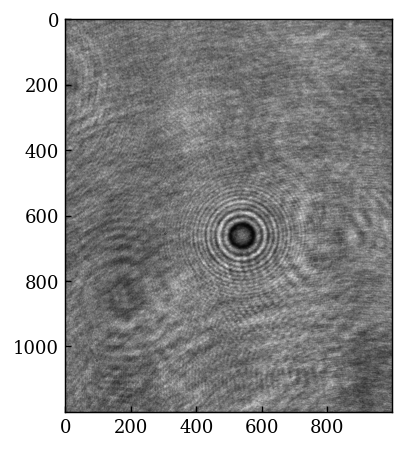

In [9]:
image = vid.get_image(1)
plt.imshow(image,cmap="gray")

(6, 1200, 1000)


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.23it/s]


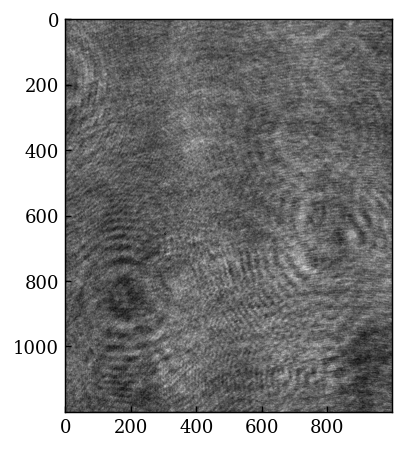

In [10]:
vid.number = 130000
buf, background = vid.get_background(5)
#background = np.ones_like(image)* np.mean(image)
#vid.background = background
plt.imshow(vid.background,cmap="gray")
#print(np.mean(image))

In [11]:
#imageio.imwrite("background"+generic_output_name+".tiff", vid.background)

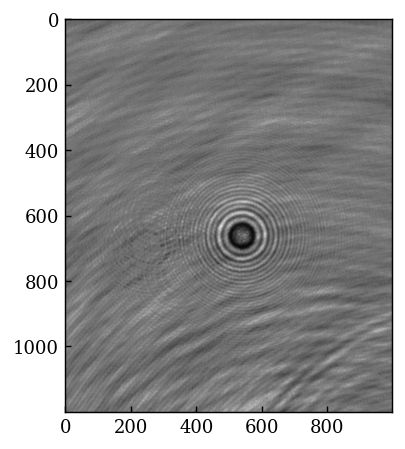

In [12]:
normed_image = utilities.normalize(image, vid.background)
plt.imshow(normed_image, cmap="gray")
normed_image = normed_image

In [13]:
feature = utilities.center_find(normed_image)


In [14]:
feature

[{'x_p': 540.7763348647269,
  'y_p': 657.1387238386932,
  'bbox': ((449, 566), 182, 182)}]

In [15]:
x, a, b = feature[0]["bbox"]

In [16]:
a

182

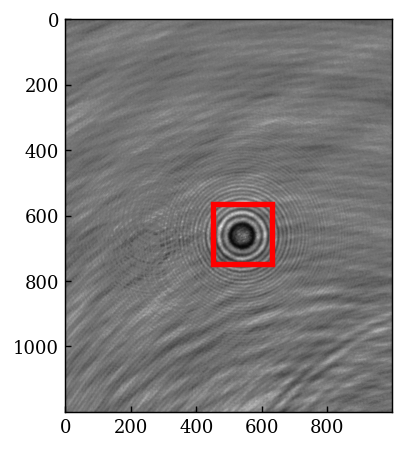

In [17]:
utilities.plot_bounding(normed_image,feature)

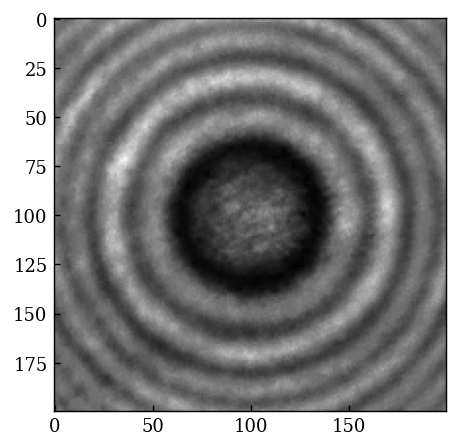

In [18]:
x, y, w, h = [feature[0]['x_p'], feature[0]['y_p'],*feature[0]["bbox"][1:]]
x = x 
y = y + 4
x_center = x
y_center = y
h = 200
im_c = fit.crop(image, int(x), int(y), int(h))
bk_c = fit.crop(vid.background, int(x), int(y), int(h))
cropped = utilities.normalize(im_c,bk_c, dark_count = np.min(im_c))
cropped = cropped / np.mean(cropped)
plt.imshow(cropped,cmap = "gray")

In [19]:
#fitter = fit.fitting(cropped,0.532,calib, n_m = 1.33)
#fitter.make_guess(1.5,1.59,8,alpha = 1,fit_r=True, fit_n=True,fit_alpha=True)

In [20]:
from pylorenzmie.analysis import Feature
from pylorenzmie.theory import LMHologram
from pylorenzmie.utilities import coordinates

In [21]:
#img = cropped
## TEST Yacine
img = image = imageio.imread("toto.png")
img = img/np.mean(image)

In [22]:


feature = Feature(model=LMHologram(double_precision=False))
feature.data = img
# Instrument configuration
ins = feature.model.instrument
ins.wavelength = 0.532     # [um]
ins.magnification = 0.0532  # [um/pixel]
ins.n_m = 1.33
feature.coordinates = coordinates(img.shape)
calib = 0.0532

In [23]:
""" mask : uniform, radial, donut, fast """

' mask : uniform, radial, donut, fast '

In [24]:
# import timeit
# #
# masks = ["uniform", "radial", "donut", "fast"]
# percentpix = np.linspace(0.01, 0.99, 10)
# mask_time = {}
# for i in masks:
#     time = []
#     std = []
#     feature.mask.distribution = i

#     for j in percentpix:
#         feature.mask.percentpix = j
#         timer = %timeit -o  -q -n 2 feature.mask._update()
#         time.append(timer.average)
#         std.append(timer.stdev)

#     mask_time[i] = time
#     mask_time[i+"_err"] = std

    

In [25]:
# timer.stdev

In [26]:
# total_pix = img.shape[0] * img.shape[1] 
# plt.figure()
# for i in masks:
#     plt.errorbar(np.array(percentpix)*total_pix, mask_time[i],xerr=mask_time[i+"_err"], yerr=mask_time[i+"_err"],ecolor="black", capsize=3,capthick=1,fmt="o", label=i)
# plt.loglog()
# plt.legend()

# plt.xlabel("# pixels")
# plt.ylabel("mask draw time (s)")

In [34]:
feature = utilities.center_find(img)
feature

[{'x_p': 112.85172156804293,
  'y_p': 125.59129527500373,
  'bbox': ((-87, -74), 400, 400)}]

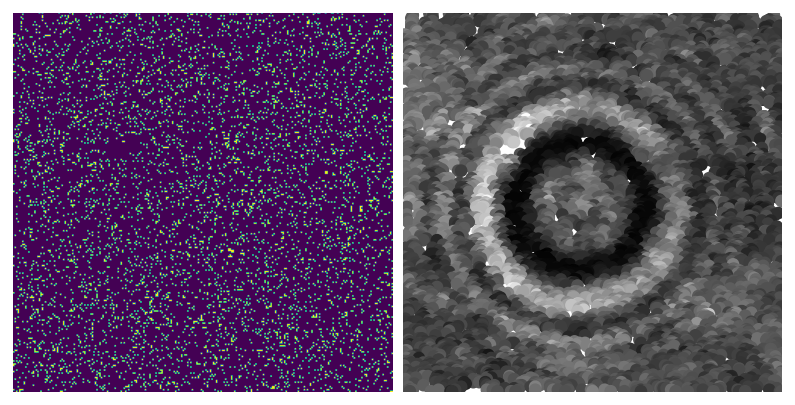

In [75]:
calib = 0.0532
fitter = fit.fitting(img,0.532,calib, n_m = 1.43, percentpix=0.1, mask="fast")
fitter.show_mask()

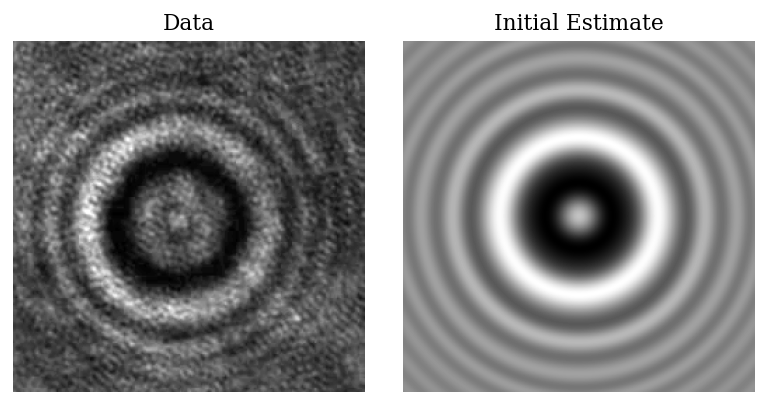

In [76]:
fitter.make_guess(1.52,1.33,12, show_estimate = True)


In [77]:

plt.ion()
@widgets.interact(z=(0, 30, 0.5), r =(1, 10, 0.01), continuous_update=False)
def foo(z, r):
    fitter.make_guess(r,1,z, show_estimate = True)


interactive(children=(FloatSlider(value=15.0, description='z', max=30.0, step=0.5), FloatSlider(value=5.0, des…

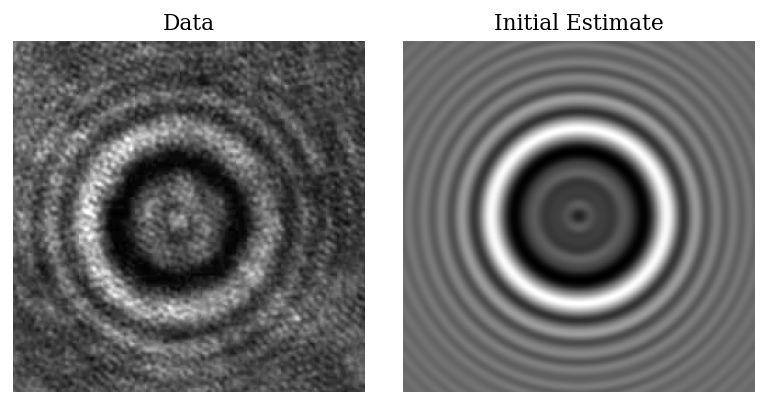

In [81]:
fitter.make_guess(2.5,1.33,4, show_estimate = True)

npixels = 6300
x_p = 116.9000 +- 0.0851
y_p = 128.9661 +- 0.0737
z_p = 108.0857 +- 0.4941
a_p = 2.5711 +- 0.0055
n_m = 1.3989 +- 0.0007
chisq = 2.51


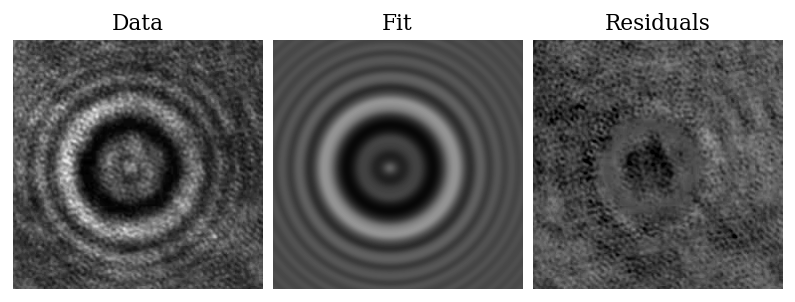

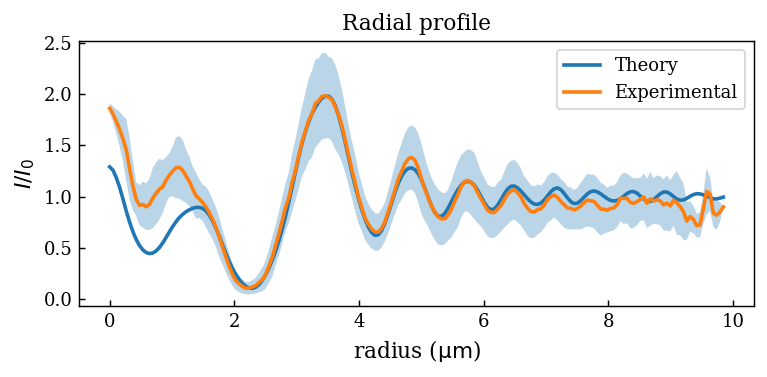

In [82]:
#vary = ['x_p', 'y_p', 'z_p']
vary = ['x_p', 'y_p', 'z_p', 'a_p', "n_m"]
fitter.set_vary(vary)
#fitter.set_vary([ 'x_p', 'y_p', 'z_p', 'a_p', 'n_p'])
result = fitter.optimize(report = True, present=True, radial_profile = True)

In [80]:
107.3068 * calib

5.7087217599999995

In [30]:
stop

NameError: name 'stop' is not defined

In [ ]:
result

In [47]:
fitter.fit_video(vid = vid,savefile="find_nr.dat",xc = x ,yc= y, h=200, n_end=5000, method = "lm", dark_count_mode="min", loss="linear", percentpix = 0.01)

100%|██████████████████████████████████████████████████████████████████████████████| 4999/4999 [13:57<00:00,  5.97it/s]


In [50]:
n_r = np.fromfile("find_nr.dat", dtype=np.float64)
n_r = n_r.reshape(len(n_r)//5,5)
r = n_r[:,3]
n = n_r[:,4]

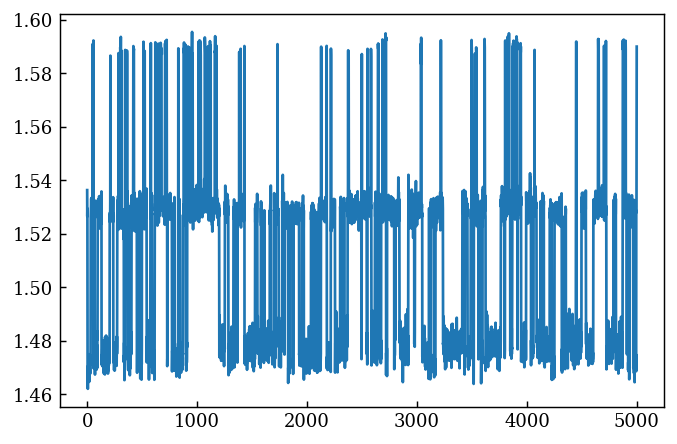

In [51]:
plt.plot(r)

C:\Users\m.lavaud\.conda\envs\dev_pylorenzmie\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

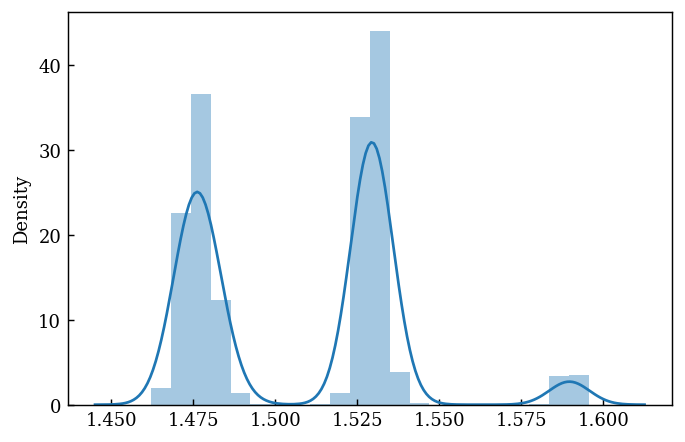

In [52]:
sns.distplot(r)

Text(0.5, 0, 'r [$\\mathrm{\\mu m}$]')

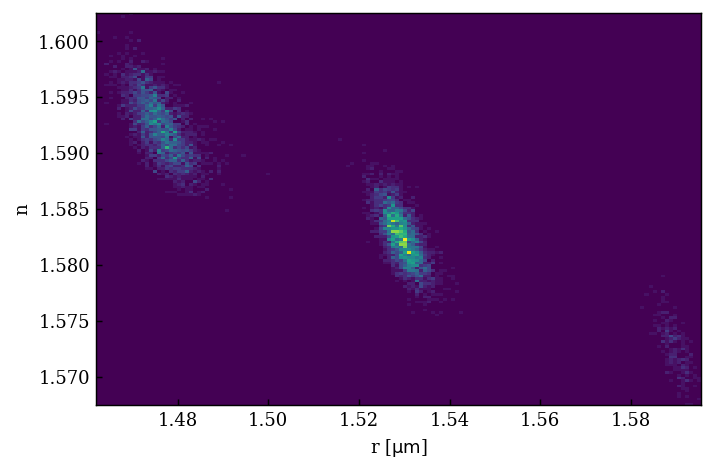

In [53]:
H, xedges, yedges = np.histogram2d(n, r, bins=100)
H = H.T  # Let each row list bins with common y range.


plt.hist2d(r,n, bins = 150)
plt.ylabel("n")
plt.xlabel("r [$\mathrm{\mu m}$]")



Text(0.5, 1.0, 'KDE r n')

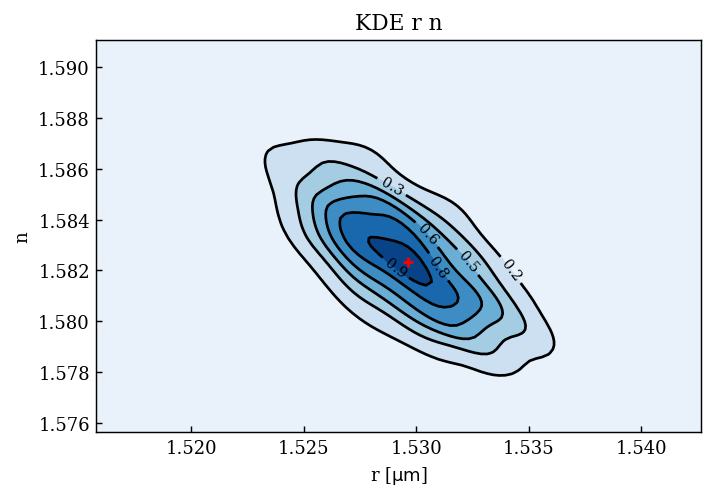

In [55]:


import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = r[(r>1.51) & (r<1.55)]
y = n[(r>1.51) & (r<1.55)]
xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
f = f/np.max(f)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k', levels=6)
# Label plot
ax.clabel(cset, inline=1, fontsize=8, fmt="%1.1f")
plt.scatter(xx[np.where(f == 1)],yy[np.where(f == 1)], color = "red", marker="+")
ax.set_xlabel("r [$\mathrm{\mu m}$]")
ax.set_ylabel("n")
plt.title("KDE r n")

#pl.show()

